# CS 109A Data Science: Project
**Harvard University**<br>
**Fall 2016**<br>
**Team member:** Becerra, Fernando; Mayo, Andrew Wayne; Ding, Yi; Cao, Xinrui<br>
**Project topic:** Predicting Seizures and Epilepsy

In [103]:
import numpy as np
import pandas as pd
import scipy as sp
import time
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [104]:
# Read in the data set
epil = pd.read_csv('Data/Updated seizure csv/epil.csv', delimiter=',')
epil.head()

,Unnamed: 0,y,trt,base,age,V4,subject,period,lbase,lage
0,1,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,2,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,4,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,5,3,placebo,11,30,0,2,1,-0.756354,0.081414


In [105]:
# Change objects into numerics
list1 = np.where(epil['trt']=='progabide')
list2 = np.where(epil['trt']!='progabide')
for ind in list1:
    epil['trt'][ind] = 1

for ind in list2:
    epil['trt'][ind] = 0
sum(epil['trt'])

epil.head()
x = epil.iloc[:, 2:9]   # 7 covariates
y = epil.iloc[:, -9]    # count of seizure for a 2-week period.

/Users/Jessica/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jessica/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
# Fit a Linear Discriminant Analysis (LDA)
LDA = da.LinearDiscriminantAnalysis()
model_LDA = LDA.fit(x, y.astype(int))
print 'Accuracy of LDA:', LDA.score(x,y.astype(int))

Accuracy of LDA: 0.317796610169


In [107]:
# Fit a multinomial logistic regression model
logitm = sk.LogisticRegression(C = 1000000, penalty="l1")
logitm.fit(x, y)

print 'Accuracy of multinomial logistic regression:', logitm.score(x,y.astype(int))

Accuracy of multinomial logistic regression: 0.338983050847


- **Each subject is observed in 4 period, should we combine them into 1 longer period and build model on top of that?** 

In [170]:
# Read in data set UKDA-2024-tab
UKDA_2024_tab = pd.read_table('Data/1958 NCDS/UKDA-2024-tab/tab/warnock.tab.txt')
UKDA_4992_tab = pd.read_table('Data/1958 NCDS/UKDA-4992-tab/tab/ncds37yearsurveydata.tab.txt')
UKDA_5567_tab1 = pd.read_table('Data/1958 NCDS/UKDA-5567-tab/tab/ncds5cmi.tab.txt')
UKDA_5567_tab2 = pd.read_table('Data/1958 NCDS/UKDA-5567-tab/tab/ncds5mc.tab.txt')
UKDA_5578_tab = pd.read_table('Data/1958 NCDS/UKDA-5578-tab/tab/ncds6.tab.txt')
UKDA_6137_tab = pd.read_table('Data/1958 NCDS/UKDA-6137-tab/tab/ncds_2008_followup.tab.txt')


In [215]:
# 1976, age = 18
list_epil = np.where(UKDA_2024_tab['NW0284'] == 2)    # Health problem Epilepsy  
list_epil2 = np.where(UKDA_2024_tab['NW0285'] == 2)    # Health problem Epilepsy 
print list_epil, list_epil2

diseased_size = 6
sample_size = len(UKDA_2024_tab)
y18 = float(diseased_size)/float(sample_size)

(array([  3,  94, 163, 295, 381]),) (array([382]),)


In [216]:
# 1991, age = 33
ever_suffer = np.where(UKDA_5567_tab1['n503930'] =="1")
only_pregnant = np.where(UKDA_5567_tab1['n503930'] =="2")
suffer_last_12_month = np.where(UKDA_5567_tab1['n503931']=='1')
seen_doctor_last_12_month = np.where(UKDA_5567_tab1['n503932']=='1')
print ever_suffer  # Ever suffered yes
print only_pregnant   # Only when pregnant
print suffer_last_12_month   # subject having seizure during the last 12 month
print seen_doctor_last_12_month   # subject went to the doctor's during the last 12 month

#for ind in ever_suffer:
#    diseased_individual = UKDA_5567_tab1.iloc[ind]
#print diseased_individual.shape

diseased_size = 138 + 22
sample_size = len(UKDA_5567_tab1)
y33_1 = float(diseased_size)/float(sample_size)

(array([   20,    53,    90,    92,    95,   350,   505,   561,   581,
         786,   842,   872,   906,   930,  1005,  1101,  1103,  1104,
        1167,  1310,  1386,  1411,  1422,  1555,  1562,  1831,  2061,
        2062,  2063,  2082,  2128,  2225,  2332,  2346,  2409,  2542,
        2549,  2582,  2588,  2663,  2753,  3077,  3209,  3253,  3259,
        3289,  3306,  3318,  3383,  3560,  3610,  3826,  3900,  3931,
        4139,  4292,  4511,  4523,  4678,  4780,  4813,  4885,  4924,
        5056,  5058,  5216,  5287,  5584,  5643,  5702,  5940,  5944,
        5995,  6017,  6147,  6232,  6297,  6362,  6371,  6573,  6599,
        6603,  6645,  6689,  6807,  6835,  6939,  6941,  7028,  7043,
        7063,  7190,  7266,  7354,  7475,  7575,  7709,  7717,  7754,
        7846,  7966,  7997,  8254,  8273,  8359,  8472,  8510,  8681,
        8799,  8803,  8885,  8977,  8982,  9191,  9280,  9293,  9375,
        9423,  9458,  9506,  9615,  9824,  9831,  9868,  9915, 10049,
       10076, 10129

In [217]:
# 1991, AGE = 33
mother_epil_ever = np.where(UKDA_5567_tab2['n516623'] == 1)   # mother who had epil before
print mother_epil_ever

age_first_attack = np.where(UKDA_5567_tab2['n516624'] != 0)    # age first attacked by epil
print age_first_attack

age_last_attack = np.where(UKDA_5567_tab2['n516626'] != 0)    # age last attacked by epil
print age_last_attack
    
diseased_size = 13
sample_size = len(UKDA_5567_tab2)
y33_2 = float(diseased_size)/float(sample_size)
y33 = float(138 + 22+13) / (len(UKDA_5567_tab1) + len(UKDA_5567_tab2))


(array([ 371, 1363, 1438, 1565, 1793, 1925, 2360, 3295, 3629, 3780, 3977,
       4234]),)
(array([ 371, 1363, 1438, 1565, 1793, 1925, 3780, 3977, 4234]),)
(array([ 371, 1363, 1438, 1565, 1793, 1925, 2360, 3295, 3629, 3780, 3977]),)


In [218]:
# 1995, age = 37
np.where(UKDA_4992_tab['nss2127'] =="6")    ## long-term problem: Epilepsy

diseased_size = 6
sample_size = len(UKDA_4992_tab)
y37 = float(diseased_size)/float(sample_size)

In [219]:
# 1999-2000, AGE 42
seizure_ever = np.where(UKDA_5578_tab['fit'] == 1)   # CM ever had fits,convulsions,epilepsy
#print seizure_ever
len(UKDA_5578_tab)
#len(seizure_ever)
for ind in seizure_ever:
    diseased_individual = UKDA_5578_tab.iloc[ind]
diseased_individual.shape

#UKDA_5578_tab[['fit','sexp','age', 'sex']].describe() 

diseased_size = 119
sample_size = len(UKDA_5578_tab)
y42 = float(diseased_size)/float(sample_size)

#diseased_individual[sexp]
#diseased_individual[age]
#print UKDA_5578_tab.columns.values

In [220]:
# 2008-2009, AGE 50
seizure_ever1 = np.where(UKDA_6137_tab['N8KHPB04'] == 1)   # "KHLPRB4" CM ever had fits,convulsions,epilepsy
#print seizure_ever1

medicat1 = np.where(UKDA_6137_tab['N8FITSMD'] == 1) # "fitsmed" reg medicat for convulsion/fits/epileptic seizures
#print medicat1

seizure_ever2 = np.where(UKDA_6137_tab['N8XKHP04'] == 1) # "Proxy" CM ever had fits,convulsions,epilepsy
#print seizure_ever2

medicat2 = np.where(UKDA_6137_tab['N8XFITMD'] == 1) # "proxy" reg medicat for convulsion/fits/epileptic seizures
#print medicat2

#UKDA_6137_tab[['age', 'sex']].describe()

for ind in seizure_ever1:
    diseased_size = UKDA_6137_tab.iloc[ind]
diseased_size.shape

#diseased_size = len(seizure_ever1) + len(seizure_ever2)
diseased_size = 81
sample_size = len(UKDA_6137_tab)
y50 = float(diseased_size)/float(sample_size)


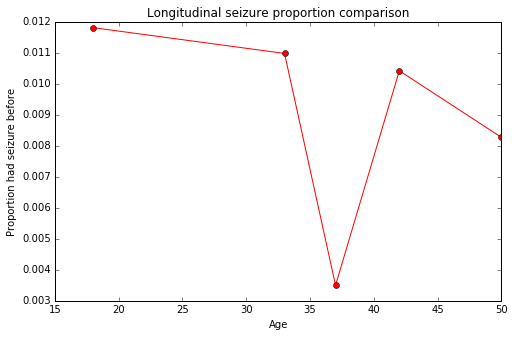

In [225]:
list_proportion = [y18, y33, y37, y42, y50]
list_age = [18, 33, 37, 42, 50]
plt.figure(figsize=(8,5))
plt.plot(list_age, list_proportion,'ro-')
plt.xlabel('Age'); plt.ylabel('Proportion had seizure before')
plt.title('Longitudinal seizure proportion comparison')
plt.show()